## Training with TPrime_600GeV_&_ttgg_As_ background
>This is the training of signal and bacgrund to get the output as a HDF5 file. The output file futher used to test on the TPrime at 1200GeV as signal.


Here, The input files are Signal with Tprime and background file used here are ttgg. Both have been used with the same number of input varaibles.'dipho_pt','dipho_phi', 'dipho_eta','dipho_e','dipho_mass','dipho_leadPt', 'dipho_leadEt','dipho_leadEta','dipho_leadPhi', 'dipho_subleadEta','bjet1_pt','bjet2_pt','bjet1_eta', 'bjet2_eta', 'jet1_pt','jet2_pt', 'jet1_eta', 'n_jets', 'n_bjets', 'bjet2_phi', 'bjet3_phi', 'bjet1_discr','bjet2_discr', 'bjet3_discr', 'jet3_pt', 'jet3_phi', 'jet1_e', 'jet2_e', 'jet3_e'.

In [8]:
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam, adadelta, adagrad

sns.set(color_codes = True)
sns.set_palette(sns.color_palette("muted"))

from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Welcome to JupyROOT 6.20/06


## Import the datasets

>Import all the signal and the backgrounds 
 * Signals 
     signal_TPrime_600 = /eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root
        

In [9]:
signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'

In [10]:
treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"

In [11]:
columns = ['dipho_leadPt',
             'dipho_mass',
             'dipho_leadEta',
             'dipho_subleadEta',
             'dipho_leadIDMVA',
             'dipho_subleadIDMVA',
             'dipho_lead_haspixelseed',
             'dipho_sublead_haspixelseed',
             'n_jets',
             'n_bjets',
             'n_centraljets',
             'lepton_charge',
             'lepton_leadPt',
             'lepton_leadEta',
             'fwdjet1_pt',
             'fwdjet1_eta',
             'fwdjet1_discr',
             'top_mt',
             'dr_tHchainfwdjet',
             'dr_leptonbjet',
             'dr_leptonfwdjet',
             'dr_bjetfwdjet',
             'dr_leadphofwdjet',
             'dr_subleadphofwdjet',
             'bjet1_pt',
             'bjet2_pt',
             'bjet3_pt',
             'bjet1_eta',
             'bjet2_eta',
             'bjet3_eta',
             'bjet1_discr',
             'bjet2_discr',
             'bjet3_discr',
             'jet1_pt',
             'jet2_pt',
             'jet3_pt',
             'jet1_eta',
             'jet2_eta',
             'jet3_eta',
             'jet1_discr',
             'jet2_discr',
             'jet3_discr']
             

## Variables

In [12]:
variables = ['dipho_leadPt',
             'dipho_mass',
             'dipho_leadEta',
             'dipho_subleadEta',
             'dipho_leadIDMVA',
             'dipho_subleadIDMVA',
             'dipho_lead_haspixelseed',
             'dipho_sublead_haspixelseed',
             'n_jets',
             'n_bjets',
             'n_centraljets',
             'lepton_charge',
             'lepton_leadPt',
             'lepton_leadEta',
             'fwdjet1_pt',
             'fwdjet1_eta',
             'fwdjet1_discr',
             'top_mt',
             'dr_tHchainfwdjet',
             'dr_leptonbjet',
             'dr_leptonfwdjet',
             'dr_bjetfwdjet',
             'dr_leadphofwdjet',
             'dr_subleadphofwdjet',
             'bjet1_pt',
             'bjet2_pt',
             'bjet3_pt',
             'bjet1_eta',
             'bjet2_eta',
             'bjet3_eta',
             'bjet1_discr',
             'bjet2_discr',
             'bjet3_discr',
             'jet1_pt',
             'jet2_pt',
             'jet3_pt',
             'jet1_eta',
             'jet2_eta',
             'jet3_eta',
             'jet1_discr',
             'jet2_discr',
             'jet3_discr']
             
             

In [13]:
signal_Tprime600 = root2array(signal, treeName_signal, variables)   #Signal TPrime at 600TeV
back_ttgg = root2array(back_1, treeName_back_1, variables) 

In [14]:
signal_Tprime600 = pd.DataFrame(signal_Tprime600)            #Signal for the testing
back_ttgg = pd.DataFrame(back_ttgg)

In [15]:
signal_Tprime600.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,199.472260,126.641273,0.084015,1.195149,0.957987,0.687579,0.0,0.0,3.0,1.0,...,-999.0,84.649239,74.393456,32.669273,-0.487586,-3.465604,-2.688962,0.542797,-2.000000,-2.0
1,217.392303,124.014992,-0.121357,-0.101361,0.872169,0.967785,0.0,0.0,2.0,1.0,...,-999.0,112.434402,84.011833,-999.000000,0.293124,2.278897,-999.000000,0.638937,0.721447,-999.0
2,121.089691,123.836288,0.842742,1.373165,0.888976,0.919611,0.0,0.0,4.0,1.0,...,-999.0,91.825996,62.056263,38.143219,3.149675,-3.128838,4.403498,-2.000000,-2.000000,-2.0
3,158.326920,122.239555,0.202652,0.260665,0.956062,0.762749,0.0,0.0,2.0,1.0,...,-999.0,87.551056,85.922279,-999.000000,1.111560,2.848130,-999.000000,0.991427,-2.000000,-999.0
4,139.716736,123.026970,0.194240,0.534833,0.163151,0.361930,0.0,0.0,4.0,1.0,...,-999.0,177.258102,169.389847,27.921988,-0.204870,0.046312,-2.416145,0.998264,0.043448,-2.0


In [16]:
signal_Tprime600.shape

(81013, 42)

In [17]:
len(signal_Tprime600)

81013

In [18]:
signal_Tprime600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81013 entries, 0 to 81012
Data columns (total 42 columns):
dipho_leadPt                  81013 non-null float32
dipho_mass                    81013 non-null float32
dipho_leadEta                 81013 non-null float32
dipho_subleadEta              81013 non-null float32
dipho_leadIDMVA               81013 non-null float32
dipho_subleadIDMVA            81013 non-null float32
dipho_lead_haspixelseed       81013 non-null float32
dipho_sublead_haspixelseed    81013 non-null float32
n_jets                        81013 non-null float32
n_bjets                       81013 non-null float32
n_centraljets                 81013 non-null float32
lepton_charge                 81013 non-null float32
lepton_leadPt                 81013 non-null float32
lepton_leadEta                81013 non-null float32
fwdjet1_pt                    81013 non-null float32
fwdjet1_eta                   81013 non-null float32
fwdjet1_discr                 81013 non-nul

In [19]:
assert signal_Tprime600.isnull().sum().sum() == 0

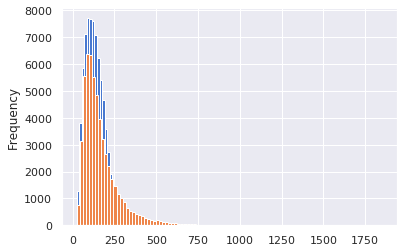

In [20]:
signal_Tprime600['jet1_pt'].plot.hist(bins=100)
back_ttgg['jet1_pt'].plot.hist(bins=100)

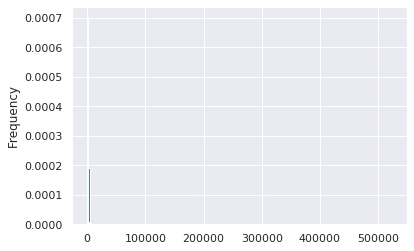

In [21]:
signal_Tprime600['top_mt'].plot.hist(bins=100, density = True)
back_ttgg['top_mt'].plot.hist(bins=100, density = True)

In [22]:
# signal_Tprime600['dipho_phi'].plot.hist(bins=100)
# back_ttgg['dipho_phi'].plot.hist(bins=100)

In [23]:
# low_high=(0,1)
# signal_Tprime600['jet2_pt'].plot.hist( alpha = 1, fill= False,
#                                         histtype = 'step', edgecolor = 'g', density=False, range=low_high, label = 'Signal')
# back_ttgg['jet2_pt'].plot.hist( alpha = 1, fill= False,
#                                         histtype = 'step', edgecolor = 'r', density=False, range=low_high, label = 'Background')
# plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
# plt.show()


In [24]:
signal = signal_Tprime600
backgr = back_ttgg

In [25]:
X = np.concatenate((signal_Tprime600, backgr))
y = np.concatenate((np.ones(signal_Tprime600.shape[0]),
                    np.zeros(backgr.shape[0])))

In [26]:

X.shape, y.shape

((136860, 42), (136860,))

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)


In [28]:
X_test.shape, y_test.shape

((45164, 42), (45164,))

In [29]:
X_train.shape, y_train.shape

((91696, 42), (91696,))

In [30]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant
from keras import callbacks
from keras.models import load_model


In [31]:
clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (42,)))
# clf.add(Dropout(3))
clf.add(Dense(200, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(200, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dropout(0.3))
clf.add(Dense(100, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(100, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(100, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_5'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model

# opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'binary_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
# plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

W0317 05:57:20.640970 140100850689856 deprecation.py:506] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 42)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               8600      
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)      

## Model Training

In [32]:
# simple early stopping
early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")
model_check_point = callbacks.ModelCheckpoint("model(with ttgg as background and TPrime_600 signal_train).h5", monitor = 'val_loss', verbose=True, 
                                              save_best_only=True, mode='auto')
# fit model
history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1, callbacks=[early_stopper, model_check_point])
# evaluate the model

Train on 64187 samples, validate on 27509 samples
Epoch 1/100
64187/64187 [==============================] - 4s 58us/step - loss: 1.3636 - acc: 0.6084 - val_loss: 1.1588 - val_acc: 0.7763

Epoch 00001: val_loss improved from inf to 1.15877, saving model to model(with ttgg as background and TPrime_600 signal_train).h5
Epoch 2/100
64187/64187 [==============================] - 1s 11us/step - loss: 1.1847 - acc: 0.7579 - val_loss: 1.0696 - val_acc: 0.8190

Epoch 00002: val_loss improved from 1.15877 to 1.06957, saving model to model(with ttgg as background and TPrime_600 signal_train).h5
Epoch 3/100
64187/64187 [==============================] - 1s 12us/step - loss: 1.0911 - acc: 0.8046 - val_loss: 1.0112 - val_acc: 0.8434

Epoch 00003: val_loss improved from 1.06957 to 1.01117, saving model to model(with ttgg as background and TPrime_600 signal_train).h5
Epoch 4/100
64187/64187 [==============================] - 1s 11us/step - loss: 1.0284 - acc: 0.8255 - val_loss: 0.9604 - val_acc: 0.85

64187/64187 [==============================] - 1s 12us/step - loss: 0.2903 - acc: 0.9455 - val_loss: 0.3886 - val_acc: 0.8920

Epoch 00032: val_loss did not improve from 0.36962
Epoch 33/100
64187/64187 [==============================] - 1s 11us/step - loss: 0.2821 - acc: 0.9456 - val_loss: 0.3840 - val_acc: 0.8908

Epoch 00033: val_loss did not improve from 0.36962
Epoch 34/100
64187/64187 [==============================] - 1s 13us/step - loss: 0.2728 - acc: 0.9470 - val_loss: 0.3877 - val_acc: 0.8832

Epoch 00034: val_loss did not improve from 0.36962
Epoch 35/100
64187/64187 [==============================] - 1s 11us/step - loss: 0.2652 - acc: 0.9477 - val_loss: 0.3836 - val_acc: 0.8823

Epoch 00035: val_loss did not improve from 0.36962


In [33]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.80%


In [34]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.17%


In [35]:
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.9 µs


### Taining are good just do the testing from here only

In [36]:
import h5py

# hf.create_dataset('dataset_1', h)

In [ ]:
# from keras.models import model_from_json
# model_json = clf.to_json()
# with open("model(with ttgg as background and TPrime_600 signal_train).json", "w") as json_file:
#     json_file.write(model_json)
# #serialize weights to HDF5
# clf.save_weights("model(with ttgg as background and TPrime_600 signal_train).h5")
# print("saved trained model with combined background and a signal to disk")

In [ ]:
# # load json and create model
# json_file = open('model(with ttgg as background and TPrime_600 signal_train).json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model(with ttgg as background and TPrime_600 signal_train).h5")
# print("Loaded model from disk")

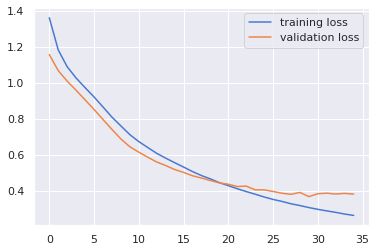

In [37]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [38]:
loaded_model = load_model("model(with ttgg as background and TPrime_600 signal_train).h5")

In [39]:
# evaluate loaded model on test data of TPrime_600
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

45164/45164 [==============================] - 4s 89us/step


In [40]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_test, y_test, verbose=0)
print('It should be compatible with the previous output from the test dataset: \n'"Here the Accuracy ouput is: \n Accuracy: %.2f%%" % (scores[1]*100))

It should be compatible with the previous output from the test dataset: 
Here the Accuracy ouput is: 
 Accuracy: 91.07%


In [41]:

print(X_test.shape)
print(y_test.shape)

(45164, 42)
(45164,)


In [42]:
# Load Testing dataset
signal_0 = signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_0 = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"
signal_Tprime1200 = root2array(signal_0, treeName_signal_0, variables)   #Signal TPrime at 600TeV

In [43]:
signal_Tprime1200 = pd.DataFrame(signal_Tprime1200)

In [44]:
signal_Tprime1200.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,534.582397,125.027214,0.566175,0.996379,0.944314,0.929853,0.0,0.0,5.0,2.0,...,-999.000000,311.581604,144.228638,90.022743,0.048455,-2.035239,3.420674,0.985339,0.047269,-2.000000
1,287.602081,124.728577,-0.733117,-0.519446,0.959960,0.918737,0.0,0.0,5.0,3.0,...,0.254300,159.142563,93.359550,60.414616,0.157884,-2.040476,2.550436,0.254300,0.030940,0.505706
2,246.845337,123.324104,-0.460441,-0.968103,0.922660,0.970355,0.0,0.0,2.0,1.0,...,-999.000000,58.944019,48.547359,-999.000000,-2.324409,-0.171253,-999.000000,0.069687,0.999494,-999.000000
3,530.529053,124.927475,-0.195753,-0.550637,0.968185,0.959774,0.0,0.0,3.0,1.0,...,-999.000000,283.501984,92.928520,29.110281,-0.501745,4.469100,-2.801659,0.998836,-2.000000,-2.000000
4,421.636475,124.109444,0.551736,0.886035,0.975925,0.969419,0.0,0.0,6.0,3.0,...,0.173882,158.900589,154.219620,103.105125,2.175221,-0.654846,-2.812661,0.999373,0.036432,-2.000000


In [64]:
print(signal_Tprime1200.shape,'\n')
print(back_ttgg.shape)

(107628, 42) 

(55847, 42)


In [46]:
X_1 = np.concatenate((signal_Tprime1200, backgr))
y_1 = np.concatenate((np.ones(signal_Tprime1200.shape[0]),
                    np.zeros(backgr.shape[0])))

In [47]:
y_1.shape

(163475,)

In [48]:
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state =5)


In [49]:
X_1_train.shape


(109528, 42)

In [50]:
X_1_test.shape

(53947, 42)

In [51]:
y_1_test.shape

(53947,)

In [52]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)

53947/53947 [==============================] - 5s 84us/step


In [61]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_1_test, y_1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.78%


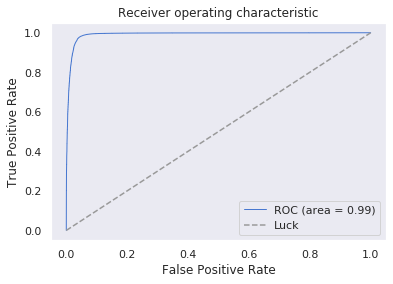

In [60]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

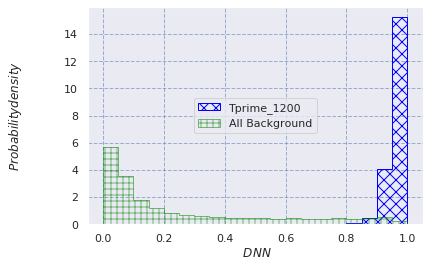

In [62]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_1_test==0]
tSig_1 = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

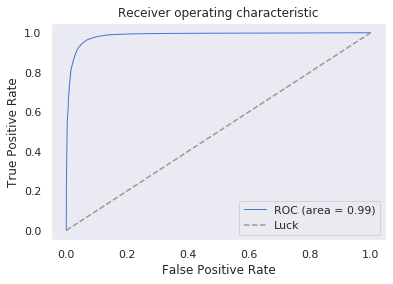

In [65]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

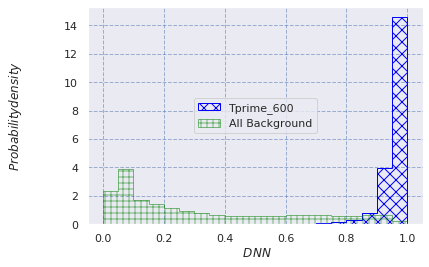

In [80]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [67]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [81]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_ttgg_background_test_with_TPrime600.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg:
    h_bak.Fill(i)
for j in tSig:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

In [ ]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_ttgg_background_test_with_TPrime1200.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_1:
    h_bak.Fill(i)
for j in tSig_1:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

# Testing with Tprime_900 

In [69]:
# Load Testing dataset
signal_1 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-900_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root/'
treeName_signal_1 = "tagsDumper/trees/Tprime_900_13TeV_THQLeptonicTag"
signal_Tprime900 = root2array(signal_1, treeName_signal_1, variables)   #Signal TPrime at 600TeV

In [70]:
signal_Tprime900;
signal_Tprime900 = pd.DataFrame(signal_Tprime900)

In [71]:
signal_Tprime900.shape


(100962, 42)

In [72]:
X_2 = np.concatenate((signal_Tprime900, backgr))
y_2 = np.concatenate((np.ones(signal_Tprime900.shape[0]),
                    np.zeros(backgr.shape[0])))

In [73]:
X_2_train,X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.33, random_state =5)


In [74]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_2_test, y_2_test)

51747/51747 [==============================] - 5s 93us/step


In [76]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_2_test, y_2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.42%


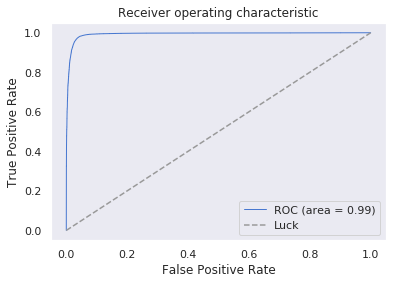

In [77]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_2_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_2_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

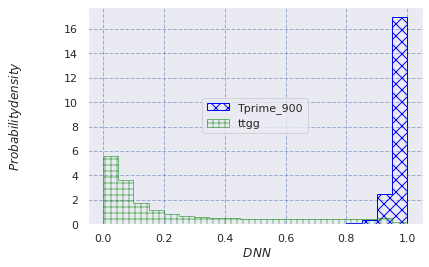

In [78]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_2_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_2 = tTest[y_2_test==0]
tSig_2 = tTest[y_2_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_2, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_900')
n, bins, patches = plt.hist(tBkg_2, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'ttgg')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [79]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_ttgg_background_test_with_TPrime900.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_2:
    h_bak.Fill(i)
for j in tSig_2:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()